In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.upload()

MessageError: ignored

In [ ]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: our_data/Ahmed Amr/0.jpg  
  inflating: our_data/Ahmed Amr/1.jpg  
  inflating: our_data/Ahmed Amr/10.jpg  
  inflating: our_data/Ahmed Amr/100.jpg  
  inflating: our_data/Ahmed Amr/101.jpg  
  inflating: our_data/Ahmed Amr/102.jpg  
  inflating: our_data/Ahmed Amr/103.jpg  
  inflating: our_data/Ahmed Amr/104.jpg  
  inflating: our_data/Ahmed Amr/105.jpg  
  inflating: our_data/Ahmed Amr/106.jpg  
  inflating: our_data/Ahmed Amr/107.jpg  
  inflating: our_data/Ahmed Amr/108.jpg  
  inflating: our_data/Ahmed Amr/109.jpg  
  inflating: our_data/Ahmed Amr/11.jpg  
  inflating: our_data/Ahmed Amr/110.jpg  
  inflating: our_data/Ahmed Amr/111.jpg  
  inflating: our_data/Ahmed Amr/112.jpg  
  inflating: our_data/Ahmed Amr/113.jpg  
  inflating: our_data/Ahmed Amr/114.jpg  
  inflating: our_data/Ahmed Amr/115.jpg  
  inflating: our_data/Ahmed Amr/116.jpg  
  inflating: our_data/Ahmed Amr/117.jpg  
  inflating: our_data/Ahmed Amr/118.jpg  
  inf

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

# Set the path to the data directory
data_dir = '/content/our_data'

In [ ]:
import cv2

IMG_HEIGHT, IMG_WIDTH = 200,200

def load_data(data_dir):
    images = []
    labels = []
    label_map = {'Ahmed Amr': 0, 'Ali Habib': 1, 'Mohamed Bebo': 2, 'Mohamed Labib': 3, 'Mohamed Mokhtar': 4}
    for subdir in os.listdir(data_dir):
        label = label_map[subdir]
        for file in os.listdir(os.path.join(data_dir, subdir)):
            # image = plt.imread(os.path.join(data_dir, subdir, file))
            image= cv2.imread(os.path.join(data_dir, subdir, file), cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            images.append(image)
            labels.append(label)
    return np.array(images, dtype=object), np.array(labels)

# Define the path to your data directory
data_dir = '/content/our_data'

# Load the data using the load_data function
X, y = load_data(data_dir)

# Split the data into training and testing sets with equal number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))
print("Number of samples in X_val:", len(X_val))
print("Number of samples in y_val:", len(y_val))
print("Number of samples in X_test:", len(X_test))
print("Number of samples in y_test:", len(y_test))


Number of samples in X_train: 640
Number of samples in y_train: 640
Number of samples in X_val: 160
Number of samples in y_val: 160
Number of samples in X_test: 200
Number of samples in y_test: 200


In [ ]:
print(X_train.shape, y_train.shape)

(640, 200, 200, 3) (640,)


In [ ]:
n_classes = 5
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
Y_val = np.asarray(Y_val).astype(np.float32)

In [ ]:
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(5, activation='sigmoid'))


In [ ]:
# Compile the CNN model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model architecture
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(200, 200, 3)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(5, activation='softmax'))


In [ ]:
# Compile the model
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((640, 200, 200, 3), (640, 5), (160, 200, 200, 3), (160, 5))

Epoch 1/2
20/20 [==============================] - 54s 3s/step - loss: 0.1840 - accuracy: 0.8703 - val_loss: 0.0850 - val_accuracy: 0.9625
Epoch 2/2
20/20 [==============================] - 52s 3s/step - loss: 0.1242 - accuracy: 0.9219 - val_loss: 0.0520 - val_accuracy: 0.9688
Epoch 1/10
20/20 [==============================] - 6s 307ms/step - loss: 0.2190 - accuracy: 0.9422 - val_loss: 0.2314 - val_accuracy: 0.9375
Epoch 2/10
20/20 [==============================] - 7s 325ms/step - loss: 0.2342 - accuracy: 0.9328 - val_loss: 0.1528 - val_accuracy: 0.9625
Epoch 3/10
20/20 [==============================] - 5s 271ms/step - loss: 0.1829 - accuracy: 0.9594 - val_loss: 0.3212 - val_accuracy: 0.8813
Epoch 4/10
20/20 [==============================] - 6s 320ms/step - loss: 0.2095 - accuracy: 0.9406 - val_loss: 0.2310 - val_accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 6s 271ms/step - loss: 0.1623 - accuracy: 0.9688 - val_loss: 0.1327 - val_accuracy: 0.9750
Epoch 6/10
2

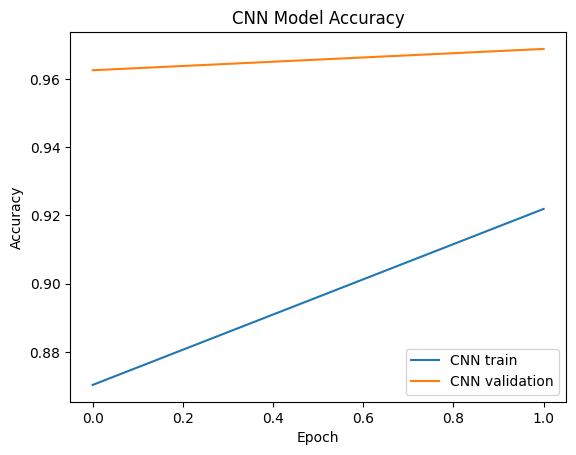

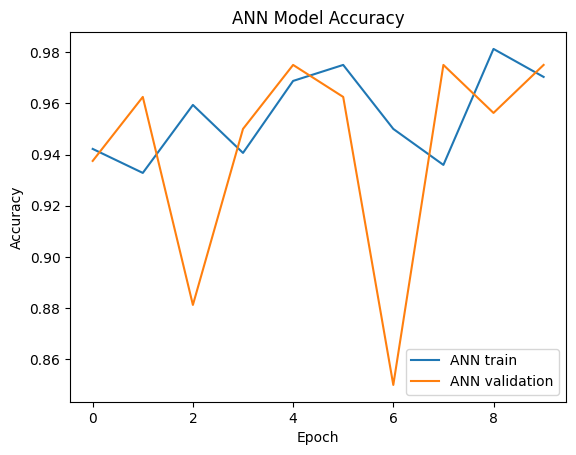

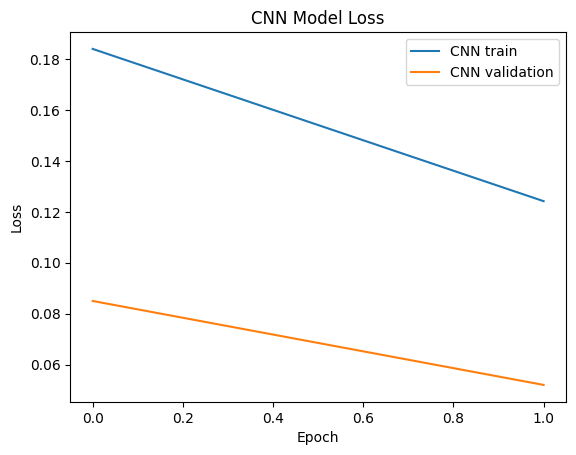

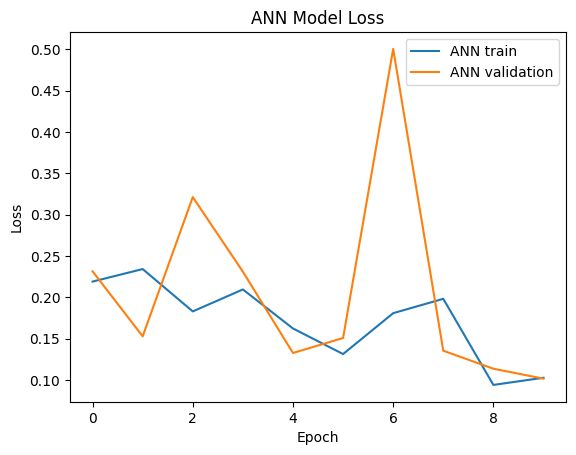

In [ ]:
import matplotlib.pyplot as plt

cnn_history = cnn_model.fit(X_train, Y_train, epochs=2, batch_size=32, validation_data=(X_val, Y_val))
# Train the ann_model
history_ann = ann_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Plot CNN accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN train', 'CNN validation'], loc='lower right')
plt.show()

# Plot ANN accuracy
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ANN train', 'ANN validation'], loc='lower right')
plt.show()

# Plot CNN loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['CNN train', 'CNN validation'], loc='upper right')
plt.show()

# Plot ANN loss
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ANN train', 'ANN validation'], loc='upper right')
plt.show()


Epoch 1/2
20/20 [==============================] - 55s 3s/step - loss: 0.6735 - accuracy: 0.2688 - val_loss: 0.4248 - val_accuracy: 0.4125
Epoch 2/2
20/20 [==============================] - 57s 3s/step - loss: 0.3409 - accuracy: 0.6781 - val_loss: 0.1681 - val_accuracy: 0.9250
Epoch 1/10
20/20 [==============================] - 7s 306ms/step - loss: 12.8902 - accuracy: 0.1813 - val_loss: 1.7352 - val_accuracy: 0.3875
Epoch 2/10
20/20 [==============================] - 6s 304ms/step - loss: 1.8049 - accuracy: 0.3609 - val_loss: 1.0086 - val_accuracy: 0.6250
Epoch 3/10
20/20 [==============================] - 6s 280ms/step - loss: 1.1377 - accuracy: 0.5906 - val_loss: 0.7605 - val_accuracy: 0.7188
Epoch 4/10
20/20 [==============================] - 7s 319ms/step - loss: 0.8881 - accuracy: 0.6828 - val_loss: 0.4635 - val_accuracy: 0.9563
Epoch 5/10
20/20 [==============================] - 6s 277ms/step - loss: 0.5727 - accuracy: 0.8328 - val_loss: 0.3641 - val_accuracy: 0.9563
Epoch 6/10


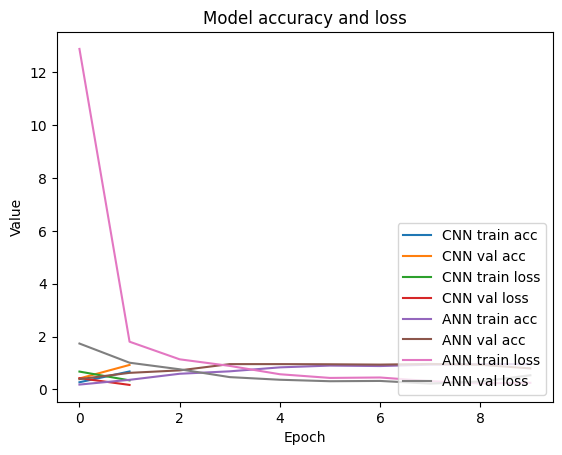

In [ ]:
import matplotlib.pyplot as plt

cnn_history = cnn_model.fit(X_train, Y_train, epochs=2, batch_size=32, validation_data=(X_val, Y_val))
# Train the ann_model
history_ann = ann_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])

plt.title('Model accuracy and loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['CNN train acc', 'CNN val acc', 'CNN train loss', 'CNN val loss', 'ANN train acc', 'ANN val acc', 'ANN train loss', 'ANN val loss'], loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the predictions for ANN and CNN
ann_predictions = ann_model.predict(X_val)
cnn_predictions = cnn_model.predict(X_val)

# Get the index of the maximum value for each prediction
ann_predictions = np.argmax(ann_predictions, axis=1)
cnn_predictions = np.argmax(cnn_predictions, axis=1)

# Calculate the metrics for ANN
ann_accuracy = accuracy_score(np.argmax(Y_val, axis=1), ann_predictions)
ann_sensitivity = recall_score(np.argmax(Y_val, axis=1), ann_predictions, average='macro')
ann_precision = precision_score(np.argmax(Y_val, axis=1), ann_predictions, average='macro')
ann_f1_score = f1_score(np.argmax(Y_val, axis=1), ann_predictions, average='macro')
ann_confusion_matrix = confusion_matrix(np.argmax(Y_val, axis=1), ann_predictions)

# Calculate the metrics for CNN
cnn_accuracy = accuracy_score(np.argmax(Y_val, axis=1), cnn_predictions)
cnn_sensitivity = recall_score(np.argmax(Y_val, axis=1), cnn_predictions, average='macro')
cnn_precision = precision_score(np.argmax(Y_val, axis=1), cnn_predictions, average='macro')
cnn_f1_score = f1_score(np.argmax(Y_val, axis=1), cnn_predictions, average='macro')
cnn_confusion_matrix = confusion_matrix(np.argmax(Y_val, axis=1), cnn_predictions)

# Print the metrics
print('ANN Accuracy: {:.2f}'.format(ann_accuracy))
print('ANN Sensitivity: {:.2f}'.format(ann_sensitivity))
print('ANN Precision: {:.2f}'.format(ann_precision))
print('ANN F1 Score: {:.2f}'.format(ann_f1_score))
print('ANN Confusion Matrix:\n', ann_confusion_matrix)
print('CNN Accuracy: {:.2f}'.format(cnn_accuracy))
print('CNN Sensitivity: {:.2f}'.format(cnn_sensitivity))
print('CNN Precision: {:.2f}'.format(cnn_precision))
print('CNN F1 Score: {:.2f}'.format(cnn_f1_score))
print('CNN Confusion Matrix:\n', cnn_confusion_matrix)


5/5 [==============================] - 3s 571ms/step
ANN Accuracy: 0.79
ANN Sensitivity: 0.82
ANN Precision: 0.88
ANN F1 Score: 0.81
ANN Confusion Matrix:
 [[23  2  0  3  0]
 [ 1 25  0  0  0]
 [ 0  0 14 26  0]
 [ 0  0  0 35  0]
 [ 0  0  0  1 30]]
CNN Accuracy: 0.93
CNN Sensitivity: 0.92
CNN Precision: 0.92
CNN F1 Score: 0.92
CNN Confusion Matrix:
 [[23  1  2  2  0]
 [ 0 24  0  1  1]
 [ 0  0 40  0  0]
 [ 0  0  0 35  0]
 [ 5  0  0  0 26]]


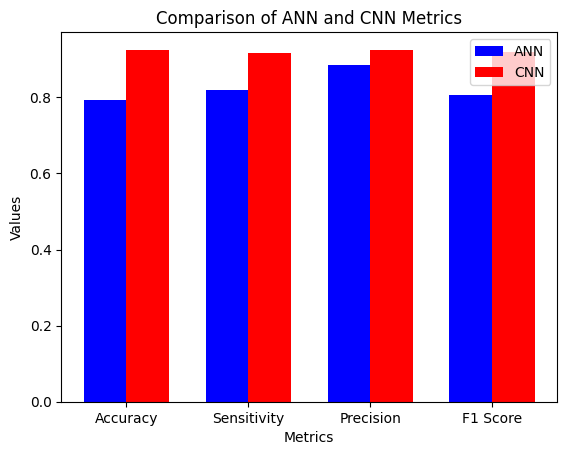

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Sensitivity', 'Precision', 'F1 Score']
ann_values = [ann_accuracy, ann_sensitivity, ann_precision, ann_f1_score]
cnn_values = [cnn_accuracy, cnn_sensitivity, cnn_precision, cnn_f1_score]

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.bar(r1, ann_values, color='blue', width=bar_width, label='ANN')
plt.bar(r2, cnn_values, color='red', width=bar_width, label='CNN')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of ANN and CNN Metrics')
plt.xticks([r + bar_width / 2 for r in range(len(metrics))], metrics)
plt.legend()

# Show the plot
plt.show()


5/5 [==============================] - 4s 825ms/step


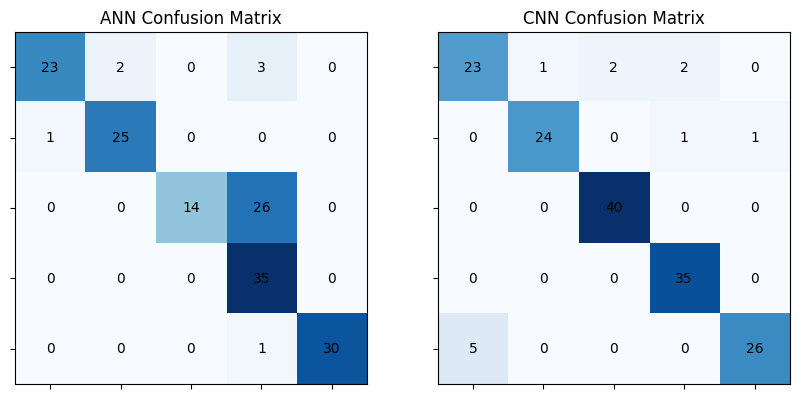

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predictions for ANN and CNN
ann_predictions = ann_model.predict(X_val)
cnn_predictions = cnn_model.predict(X_val)

# Get the index of the maximum value for each prediction
ann_predictions = np.argmax(ann_predictions, axis=1)
cnn_predictions = np.argmax(cnn_predictions, axis=1)

# Calculate the confusion matrices for ANN and CNN
ann_cm = confusion_matrix(np.argmax(Y_val, axis=1), ann_predictions)
cnn_cm = confusion_matrix(np.argmax(Y_val, axis=1), cnn_predictions)

# Plot the confusion matrices for ANN and CNN
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('ANN Confusion Matrix')
ax1.imshow(ann_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax1.set_xticks(np.arange(len(ann_cm)))
ax1.set_yticks(np.arange(len(ann_cm)))
ax1.set_xticklabels([])
ax1.set_yticklabels([])
for i in range(len(ann_cm)):
    for j in range(len(ann_cm)):
        ax1.text(j, i, ann_cm[i, j], ha='center', va='center')

ax2.set_title('CNN Confusion Matrix')
ax2.imshow(cnn_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_xticks(np.arange(len(cnn_cm)))
ax2.set_yticks(np.arange(len(cnn_cm)))
ax2.set_xticklabels([])
ax2.set_yticklabels([])
for i in range(len(cnn_cm)):
    for j in range(len(cnn_cm)):
        ax2.text(j, i, cnn_cm[i, j], ha='center', va='center')

plt.show()
